In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [20]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [21]:
X_train.shape

(50000, 32, 32, 3)

In [22]:
X_test.shape

(10000, 32, 32, 3)

In [23]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [24]:
y_train = y_train.reshape(-1,)

In [25]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

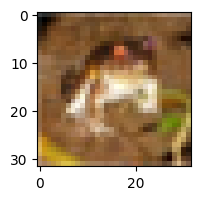

In [26]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[0])

In [27]:
classes = ["airplane" ,"automobile","bird" ,"cat" ,"deer" ,'dog' ,'frog' ,'horse' ,'ship' ,'truck']

In [28]:
def showImg(X, y, index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_train[index])
  plt.xlabel(classes[y[index]])

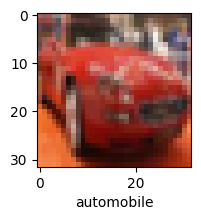

In [29]:
showImg(X_train, y_train, 5)

Normalizing pixels of images

In [30]:
X_train = X_train/255
X_test = X_test/255

### Using simple ANN for the task

In [13]:
y_train[0]

6

In [14]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32,32,3)),
    layers.Dense(3000, activation = "relu"),
    layers.Dense(1000, activation = "relu"),
    layers.Dense(10, activation = "sigmoid"),
])

ann.compile(optimizer = "SGD", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
ann.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 189s 120ms/step - loss: 1.8142 - accuracy: 0.3526
Epoch 2/10
1563/1563 [==============================] - 175s 112ms/step - loss: 1.6248 - accuracy: 0.4267
Epoch 3/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.5423 - accuracy: 0.4556
Epoch 4/10
1563/1563 [==============================] - 187s 120ms/step - loss: 1.4839 - accuracy: 0.4764
Epoch 5/10
1563/1563 [==============================] - 179s 115ms/step - loss: 1.4340 - accuracy: 0.4956
Epoch 6/10
1563/1563 [==============================] - 178s 114ms/step - loss: 1.3910 - accuracy: 0.5141
Epoch 7/10
1563/1563 [==============================] - 190s 122ms/step - loss: 1.3541 - accuracy: 0.5225
Epoch 8/10
1563/1563 [==============================] - 181s 116ms/step - loss: 1.3194 - accuracy: 0.5369
Epoch 9/10
1563/1563 [==============================] - 183s 117ms/step - loss: 1.2846 - accuracy: 0.5497
Epoch 10/10
1563/1563 [=======================

In [31]:
ann.evaluate(X_test, y_test)

313/313 [==============================] - 15s 48ms/step - loss: 1.5005 - accuracy: 0.4620


[1.5005462169647217, 0.4620000123977661]

In [32]:
pred = ann.predict(X_test)

# argmax is used to get the maximum probability out of all of them
Pred = [np.argmax(element) for element in pred]
print(classification_report(y_test, Pred))

313/313 [==============================] - 12s 37ms/step
              precision    recall  f1-score   support

           0       0.42      0.52      0.47      1000
           1       0.60      0.63      0.62      1000
           2       0.51      0.17      0.26      1000
           3       0.41      0.21      0.28      1000
           4       0.34      0.64      0.45      1000
           5       0.54      0.24      0.33      1000
           6       0.55      0.52      0.53      1000
           7       0.68      0.42      0.52      1000
           8       0.37      0.86      0.51      1000
           9       0.64      0.39      0.49      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.51      0.46      0.45     10000



### Using CNN

In [33]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3,3),
                  activation = "relu" ,input_shape = (32,32,3)),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(filters = 32, kernel_size = (3,3),
                  activation = "relu"),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),
    layers.Dense(120, activation = "relu"),
    layers.Dense(50, activation = "relu"),

    # Normalizes probabilty so they add up to 1
    layers.Dense(10, activation = "softmax")])

In [34]:
cnn.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.4677 - accuracy: 0.4683
Epoch 2/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.1303 - accuracy: 0.6003
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9839 - accuracy: 0.6521
Epoch 4/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.8885 - accuracy: 0.6890
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8157 - accuracy: 0.7133
Epoch 6/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7529 - accuracy: 0.7343
Epoch 7/10
1563/1563 [==============================] - 58s 37ms/step - loss: 0.6994 - accuracy: 0.7537
Epoch 8/10
1563/1563 [==============================] - 57s 37ms/step - loss: 0.6455 - accuracy: 0.7732
Epoch 9/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6004 - accuracy: 0.7878
Epoch 10/10
1563/1563 [==============================] - 53s 34m

In [35]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 11ms/step - loss: 0.9764 - accuracy: 0.6885


[0.9764010906219482, 0.6884999871253967]

In [36]:
pred = cnn.predict(X_test)
Pred = [np.argmax(element) for element in pred]
print(classification_report(y_test, Pred))

313/313 [==============================] - 6s 18ms/step
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1000
           1       0.80      0.80      0.80      1000
           2       0.65      0.51      0.57      1000
           3       0.52      0.45      0.48      1000
           4       0.66      0.63      0.64      1000
           5       0.61      0.56      0.58      1000
           6       0.75      0.78      0.76      1000
           7       0.71      0.78      0.74      1000
           8       0.76      0.83      0.79      1000
           9       0.69      0.81      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.68      0.69      0.68     10000



In [37]:
y_test = y_test.reshape(-1)

In [47]:
y_classes = [np.argmax(index) for index in pred]
y_classes[:5]

[8, 8, 8, 0, 4]

In [57]:
def check(index):
  plt.figure(figsize = (15,2))
  plt.imshow(X_test[index])
  plt.xlabel(classes[y_test[index]])
  print(classes[y_classes[index]])

frog


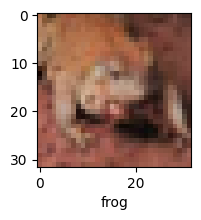

In [58]:
check(5)

airplane


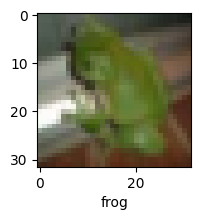

In [59]:
check(7)

frog


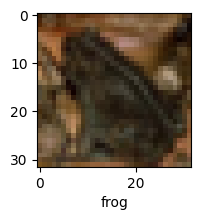

In [60]:
check(30)

ship


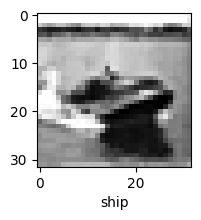

In [61]:
check(150)

horse


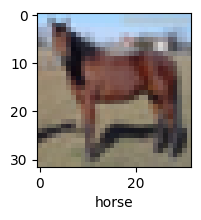

In [62]:
check(800)

deer


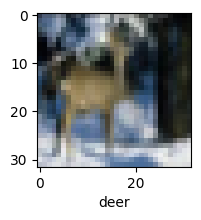

In [63]:
check(730)

automobile


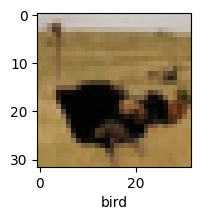

In [64]:
check(450)

airplane


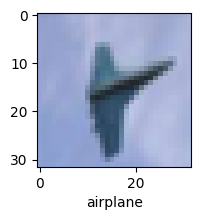

In [65]:
check(774)

ship


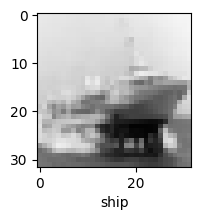

In [67]:
check(696)

bird


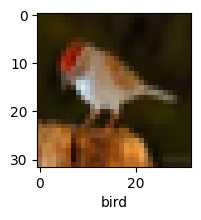

In [68]:
check(322)

truck


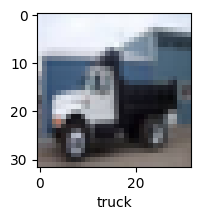

In [69]:
check(921)